# Project: Medical Appointment No show

## Introduction

* No-show appointments, defined as an appointment in which the patient did not present for treatment or cancelled the same day as the appointment, are problematic for practices at all levels of the health care system. No-shows are a missed revenue opportunity which can’t be recaptured for the practice, and which contribute to both decreased patient and staff satisfaction

* In this project, I am going to investigate a dataset of appointment records of Hospitals. In this dataset, the data includes 
some attributes of patients and state. And according to these attributes, whether the patient showed up to the appointments or not. So Here I am going to analyse this dataset and will be focused on finding the condition which influence the patient to show or not show up to appointments.

### Importing Modules

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score,recall_score,accuracy_score,confusion_matrix,f1_score
from sklearn.metrics import precision_recall_curve,auc,roc_auc_score,roc_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgm
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [5]:
os.chdir("F:\Board infinity\Capstone project\Medical_Appointment")

### Importing Dataset

In [6]:
df = pd.read_csv("data.csv")
df_new=df.copy()

In [232]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Data Description

1. PatientId: Identification of patients.
2. AppointmentID: Identification of each appointment
3. Gender: Gender of the patient
4. ScheduledDay: The day when the patient set up their appointment
5. AppointmentDay: The day when the patient has to come to hospital to consult the doctor.
6. Age: Age of the patient
7. Neighbourhood: Location of the patient
8. Scholarship: It indicates that whether the patient has some Health insurance or not
9. Hipertension: It indicates that whether the patient has hypertension or not.
10. Diabetes: It indicates that whether the patient has diabetes or not.
11. Alcoholism: It indicates that whether the patient is alcoholic or not.
12. Handcap: It indicates that whether the patient is handicaped or not.
13. SMS_received: It indicates that whether the patient has received the SMS or not.
14. No-show: It indicates that whether the patient has showed up to their appointement or not.

In [233]:
df.shape

(110527, 14)

There are 110527 records and 14 columns in the dataset.

# <font color='red'>Preprocessing and Exploratory Data Analysis (EDA)</font>

In [234]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

So there are the column name of this particular dataset. We can see that there are some typing mistake.Let's correct those 
typo mistake.

In [235]:
df.columns=['Patient_id','Appointment_id','Gender','Scheduled_day','Appointment_day', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
            'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_show']

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
Patient_id         110527 non-null float64
Appointment_id     110527 non-null int64
Gender             110527 non-null object
Scheduled_day      110527 non-null object
Appointment_day    110527 non-null object
Age                110527 non-null int64
Neighbourhood      110527 non-null object
Scholarship        110527 non-null int64
Hypertension       110527 non-null int64
Diabetes           110527 non-null int64
Alcoholism         110527 non-null int64
Handicap           110527 non-null int64
SMS_received       110527 non-null int64
No_show            110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Here are some Initial observation

1. There are 14 variables. Among these variables, 13 are independent and one variable is dependent.
2. By seeing the no of records of each column, we can concluide that there are no missing values.
3. Here the scheduled_day and appointment_day columns type are object. So it should be changed to datetime.
4. The time of the appointment day(00:00:00) is not specified here. So we will not be able to make any analysis related to time of the appointment on theat particular date.
5. Here patient Id is float type. But it should be int.

In [237]:
# converting patient_id type float to int.
df['Patient_id'] = df['Patient_id'].astype('int64')

In [238]:
# converting data type of scheduled_day and appointment_day from object to date time
df['Scheduled_day'] = pd.to_datetime(df['Scheduled_day']).dt.date.astype('datetime64[ns]')
df['Appointment_day'] = pd.to_datetime(df['Appointment_day']).dt.date.astype('datetime64[ns]')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
Patient_id         110527 non-null int64
Appointment_id     110527 non-null int64
Gender             110527 non-null object
Scheduled_day      110527 non-null datetime64[ns]
Appointment_day    110527 non-null datetime64[ns]
Age                110527 non-null int64
Neighbourhood      110527 non-null object
Scholarship        110527 non-null int64
Hypertension       110527 non-null int64
Diabetes           110527 non-null int64
Alcoholism         110527 non-null int64
Handicap           110527 non-null int64
SMS_received       110527 non-null int64
No_show            110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 11.8+ MB


#### Creating a new column i.e. difference between Scheduled_day and Appointment_day

In [239]:
df['Awaiting_day']=(df['Appointment_day']-df['Scheduled_day']).dt.days

#### Creating a new column of the particular day of the week the appointment has been scheduled

In [240]:
df['day_of_appointment']=df['Appointment_day'].dt.weekday_name

In [241]:
#checking if both the column exists
df.head()

,Patient_id,Appointment_id,Gender,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Awaiting_day,day_of_appointment
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,Friday
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Friday
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,Friday
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,Friday
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,Friday


In [242]:
df.isnull().sum()

Patient_id            0
Appointment_id        0
Gender                0
Scheduled_day         0
Appointment_day       0
Age                   0
Neighbourhood         0
Scholarship           0
Hypertension          0
Diabetes              0
Alcoholism            0
Handicap              0
SMS_received          0
No_show               0
Awaiting_day          0
day_of_appointment    0
dtype: int64

As expected there is not having any null value

##### Lets check any duplicate rows are there

In [243]:
df.duplicated().sum()

0

There are no duplicate values.

#### Get all numerical and categorical data columns

In [244]:
df._get_numeric_data().columns

Index(['Patient_id', 'Appointment_id', 'Age', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'Awaiting_day'],
      dtype='object')

In [245]:
# all categorical data columns
set(df.columns) - set(df._get_numeric_data().columns) 

{'Appointment_day',
 'Gender',
 'Neighbourhood',
 'No_show',
 'Scheduled_day',
 'day_of_appointment'}

In [246]:
df.describe()

,Patient_id,Appointment_id,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Awaiting_day
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,10.183702
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15.254996
min,3.921700e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


# Observations

1. Average age of the patient is 37. And 25% patients are below 18. But most of the patients are below 55. As per our dataset, min and max age of the patient is -1 and 115 which is not possible. We have to figure it out about this.
2. Scholarship, hypertension, Diabetes and Alcoholism are binary. i.e. the variables are 0 or 1 here.
3. In Handicap it is showing that max value is 4. that means, there may be 5 variable in this column.
4. 75% of the patients received sms regarding an appointment.
5. Average awaiting days of the patients are 10 days. 75% patients waited upto 15days and 50% patients waited upto 4 days. Only 25%patients got the appointment on the same date. There is one case where the patients got the appointment before the scheduled date which is not possible. So it will be investigated further.

## Univariet Analysis

### Gender

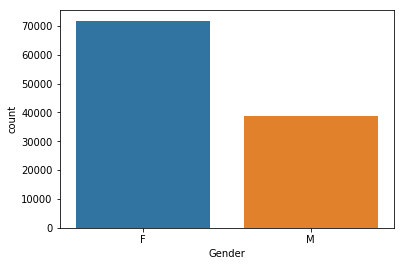

In [247]:
sns.countplot('Gender', data=df)

In [248]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

So there are more female patients compare to male patient. 71840 female patients are there and 38687 male patients are there.

### Scheduled Day

In [249]:
df['Scheduled_day'].unique()

array(['2016-04-29T00:00:00.000000000', '2016-04-27T00:00:00.000000000',
       '2016-04-26T00:00:00.000000000', '2016-04-28T00:00:00.000000000',
       '2016-04-25T00:00:00.000000000', '2016-04-20T00:00:00.000000000',
       '2016-03-31T00:00:00.000000000', '2016-04-19T00:00:00.000000000',
       '2016-04-06T00:00:00.000000000', '2016-04-18T00:00:00.000000000',
       '2016-04-11T00:00:00.000000000', '2016-04-12T00:00:00.000000000',
       '2016-04-15T00:00:00.000000000', '2016-04-01T00:00:00.000000000',
       '2016-04-05T00:00:00.000000000', '2016-04-08T00:00:00.000000000',
       '2016-04-14T00:00:00.000000000', '2016-04-13T00:00:00.000000000',
       '2016-04-07T00:00:00.000000000', '2016-03-17T00:00:00.000000000',
       '2016-03-30T00:00:00.000000000', '2016-03-29T00:00:00.000000000',
       '2016-03-18T00:00:00.000000000', '2016-03-28T00:00:00.000000000',
       '2016-03-04T00:00:00.000000000', '2016-03-15T00:00:00.000000000',
       '2016-03-14T00:00:00.000000000', '2016-03-21

We can see from the above details that the ScheduledDay for appointments are ranging from 2015-11-10 to 2016-06-08 and that's 
around 7 months of data.

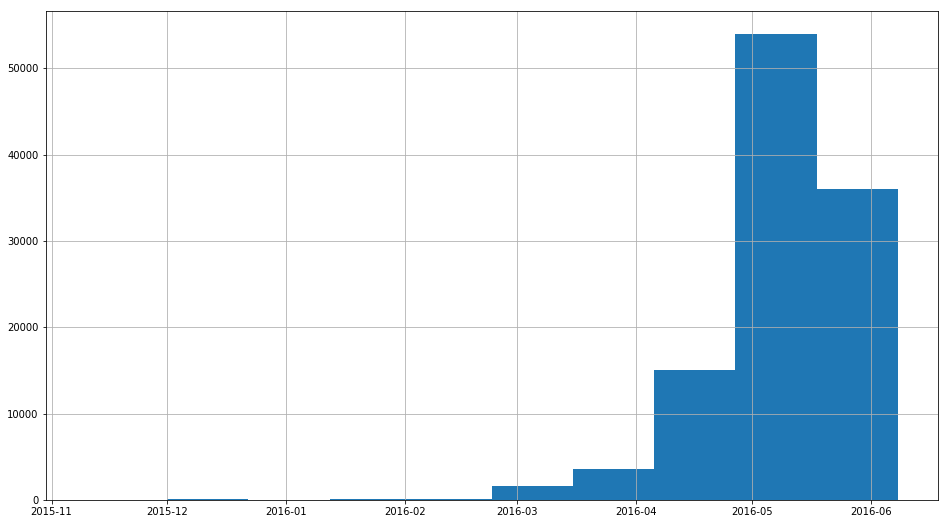

In [250]:
plt.figure(figsize=(16,9))
df['Scheduled_day'].hist()

The distribution of appointments scheduled is left skewed. Most of the schedules were made between April and June of 2016.

In [251]:
print("Scheduled date started on : {}.".format(df['Scheduled_day'].min()))
print("Last Scheduled date on :{}.".format(df['Scheduled_day'].max()))

Scheduled date started on : 2015-11-10 00:00:00.
Last Scheduled date on :2016-06-08 00:00:00.


### Appointment Day

In [252]:
df['Appointment_day'].unique()

array(['2016-04-29T00:00:00.000000000', '2016-05-03T00:00:00.000000000',
       '2016-05-10T00:00:00.000000000', '2016-05-17T00:00:00.000000000',
       '2016-05-24T00:00:00.000000000', '2016-05-31T00:00:00.000000000',
       '2016-05-02T00:00:00.000000000', '2016-05-30T00:00:00.000000000',
       '2016-05-16T00:00:00.000000000', '2016-05-04T00:00:00.000000000',
       '2016-05-19T00:00:00.000000000', '2016-05-12T00:00:00.000000000',
       '2016-05-06T00:00:00.000000000', '2016-05-20T00:00:00.000000000',
       '2016-05-05T00:00:00.000000000', '2016-05-13T00:00:00.000000000',
       '2016-05-09T00:00:00.000000000', '2016-05-25T00:00:00.000000000',
       '2016-05-11T00:00:00.000000000', '2016-05-18T00:00:00.000000000',
       '2016-05-14T00:00:00.000000000', '2016-06-02T00:00:00.000000000',
       '2016-06-03T00:00:00.000000000', '2016-06-06T00:00:00.000000000',
       '2016-06-07T00:00:00.000000000', '2016-06-01T00:00:00.000000000',
       '2016-06-08T00:00:00.000000000'], dtype='dat

From the above detail we can see that Appointment Day ranges from 2016-04-29 to 2016-06-08.

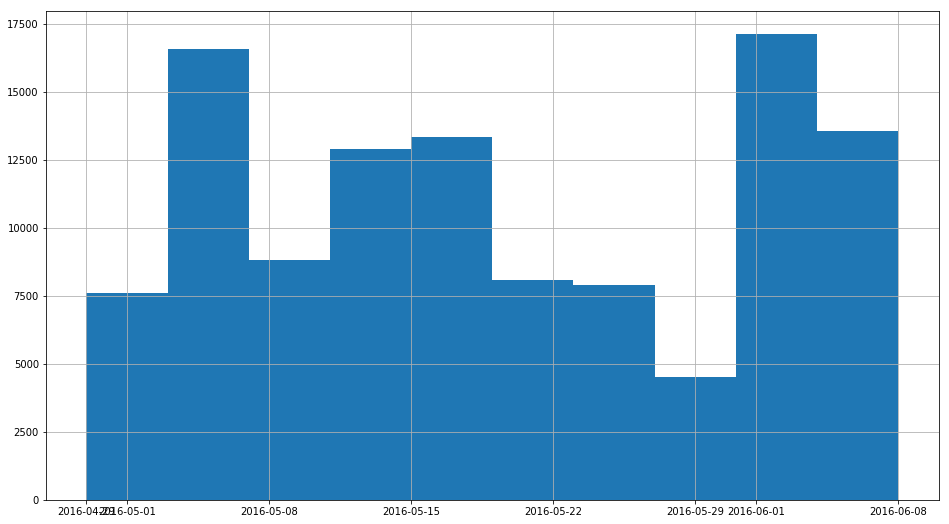

In [253]:
plt.figure(figsize=(16,9))
df['Appointment_day'].hist()

All the appointments has been done in the may month of 2016. from the above figure, we can get the last appointment date i.e.
2016-06-08

In [254]:
print("Appointment date started on : {}.".format(df['Appointment_day'].min()))

Appointment date started on : 2016-04-29 00:00:00.


### Age

Text(0.5, 1.0, 'Age Distribution')

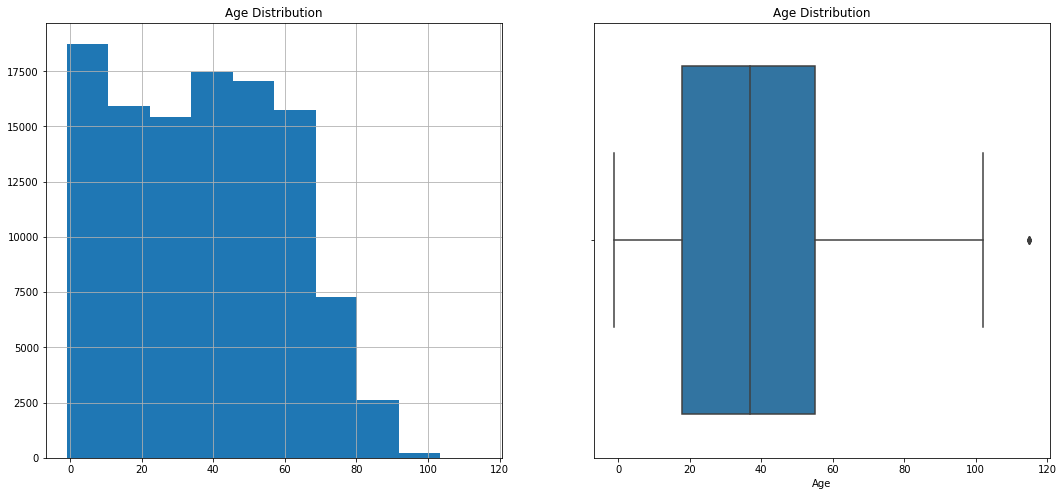

In [255]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(18,8))
df['Age'].hist(ax=ax1)
ax1.set_title('Age Distribution')
sns.boxplot(x=df.Age, ax=ax2)
ax2.set_title('Age Distribution')

Most of the patients are between 0 to 50. But it is showing that there are some patient whose age is less than 0 and greater than 100. So I will drop all the rows where age is less than 0 and greater than 110. There are some special cases people live more than 100. That's why I am considering age till 110.

#### Lets find unique values in age column

In [256]:
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

In [257]:
df = df[(df.Age >= 0) & (df.Age <= 110)]

In [258]:
print("Patients with Age less than 0 : {}".format(df[df.Age == -1].shape[0]))
print("Patients with Age greater than 110 : {} ".format(df[df.Age > 110].shape[0]))

Patients with Age less than 0 : 0
Patients with Age greater than 110 : 0 


In [259]:
df[(df.Age <= 0) & ((df.Hypertension.astype(int) == 1) | (df.Diabetes.astype(int) == 1) | (df.Alcoholism.astype(int) == 1))]

,Patient_id,Appointment_id,Gender,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Awaiting_day,day_of_appointment


As we have no records above, we will confirm our conclusion that Age value of 0 indeed represents babies who are just 
few months old.

### Neighbourhood

In [260]:
df.Neighbourhood.unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [261]:
df.Neighbourhood.nunique()

81

Total number of neighbourhood is 81

In [262]:
df['Neighbourhood'].value_counts().head(10)

JARDIM CAMBURI       7717
MARIA ORTIZ          5805
RESISTÊNCIA          4431
JARDIM DA PENHA      3877
ITARARÉ              3514
CENTRO               3334
TABUAZEIRO           3132
SANTA MARTHA         3131
JESUS DE NAZARETH    2853
BONFIM               2773
Name: Neighbourhood, dtype: int64

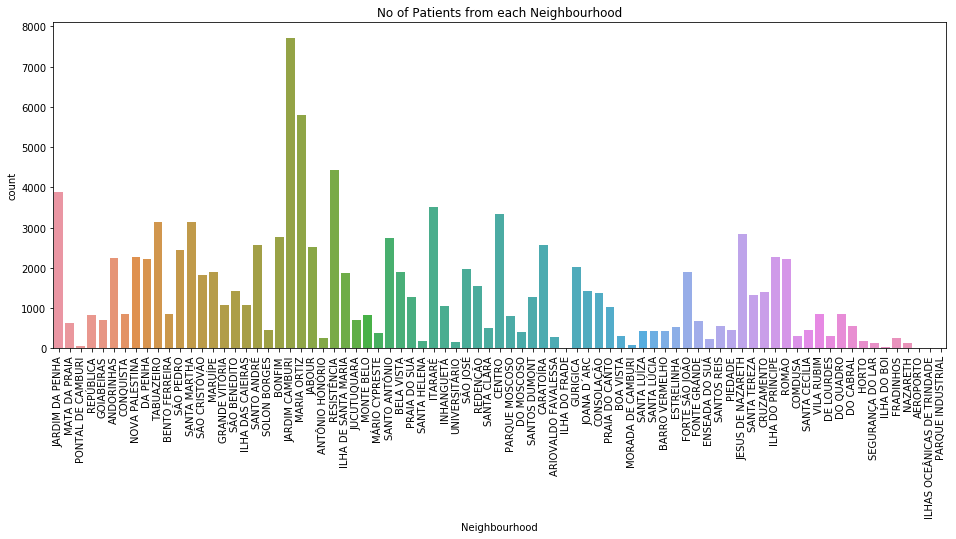

In [263]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.Neighbourhood,data=df)
ax.set_title("No of Patients from each Neighbourhood")
plt.show()

From the above visualization we can see that the top 3 neighbourhood from where the number of patients are high are 
JARDIM CAMBURI(7717),MARIA ORTIZ(5805) and RESISTÊNCIA(4431)

### Scholarship

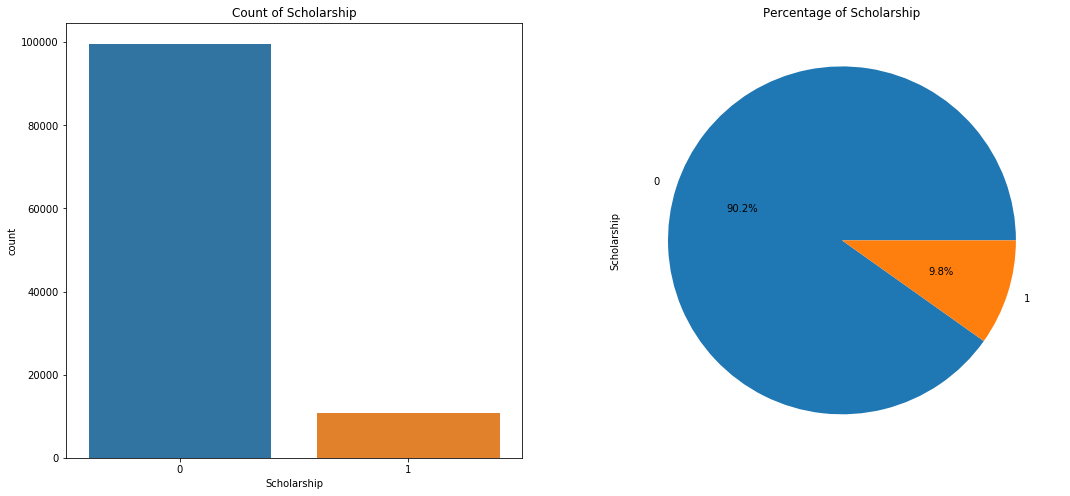

In [264]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(18,8))
sns.countplot('Scholarship', data=df, ax=ax1)
ax1.set_title('Count of Scholarship')

df['Scholarship'].value_counts().plot.pie(ax=ax2, autopct='%1.1f%%')
ax2.set_title('Percentage of Scholarship')
plt.show()

Most number of people, i.e. 90.2% of patient don't have any scholarship.

### Hypertension

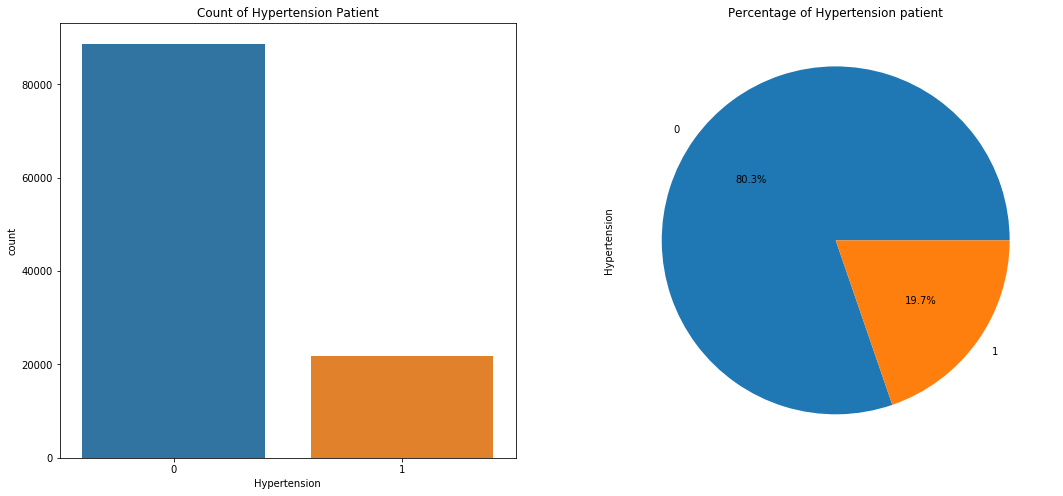

In [265]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(18,8))
sns.countplot('Hypertension', data=df, ax=ax1)
ax1.set_title('Count of Hypertension Patient')

df['Hypertension'].value_counts().plot.pie(ax=ax2, autopct='%1.1f%%')
ax2.set_title('Percentage of Hypertension patient')
plt.show()

There are only 19.7% patients who are having hypertension.

### Diabetes

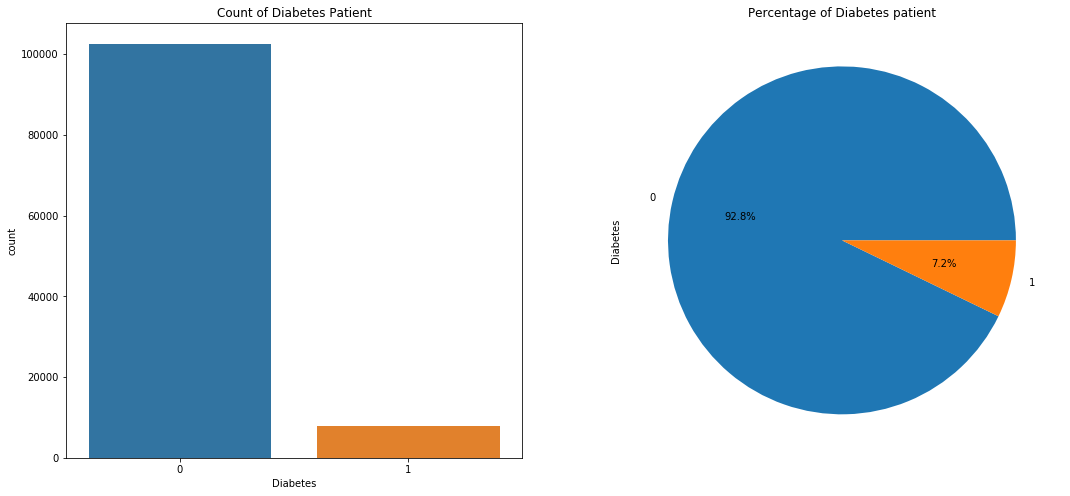

In [266]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(18,8))
sns.countplot('Diabetes', data=df, ax=ax1)
ax1.set_title('Count of Diabetes Patient')

df['Diabetes'].value_counts().plot.pie(ax=ax2, autopct='%1.1f%%')
ax2.set_title('Percentage of Diabetes patient')
plt.show()

From the above figure, we are getting that only 7.2% patients are having diabetes.

### Alcoholism

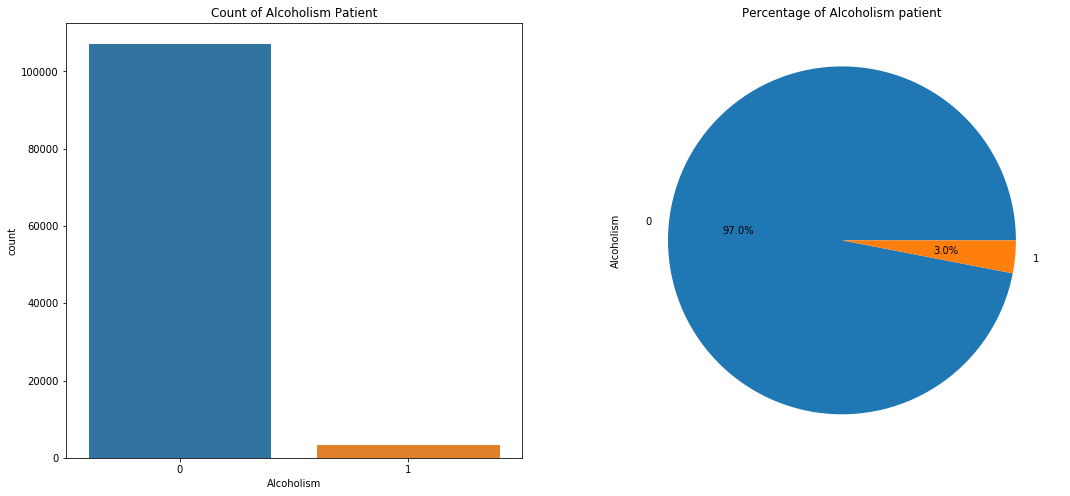

In [267]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(18,8))
sns.countplot('Alcoholism', data=df, ax=ax1)
ax1.set_title('Count of Alcoholism Patient')

df['Alcoholism'].value_counts().plot.pie(ax=ax2, autopct='%1.1f%%')
ax2.set_title('Percentage of Alcoholism patient')
plt.show()

There are only 3% Alcoholism patient

### Handicap


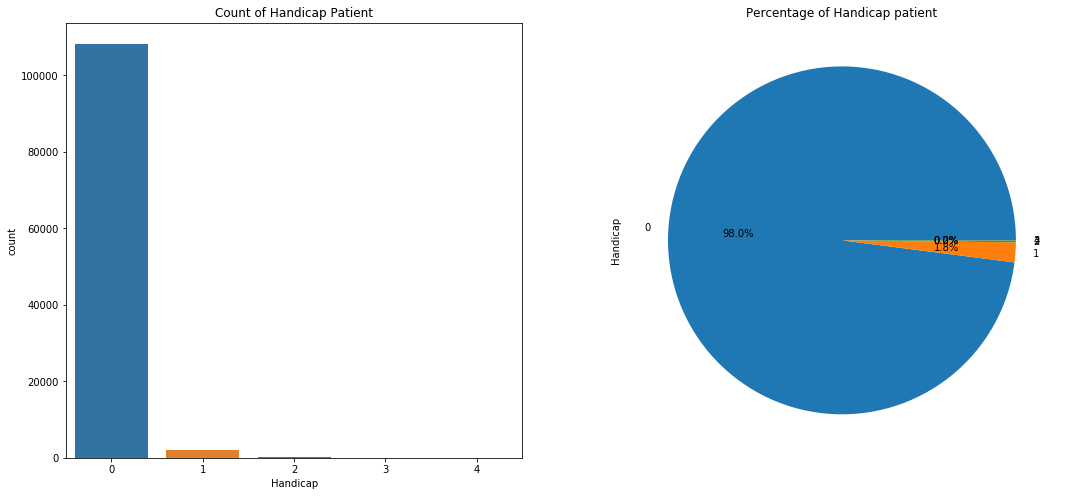

In [268]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(18,8))
sns.countplot('Handicap', data=df, ax=ax1)
ax1.set_title('Count of Handicap Patient')

df['Handicap'].value_counts().plot.pie(ax=ax2, autopct='%1.1f%%')
ax2.set_title('Percentage of Handicap patient')
plt.show()

### SMS_received


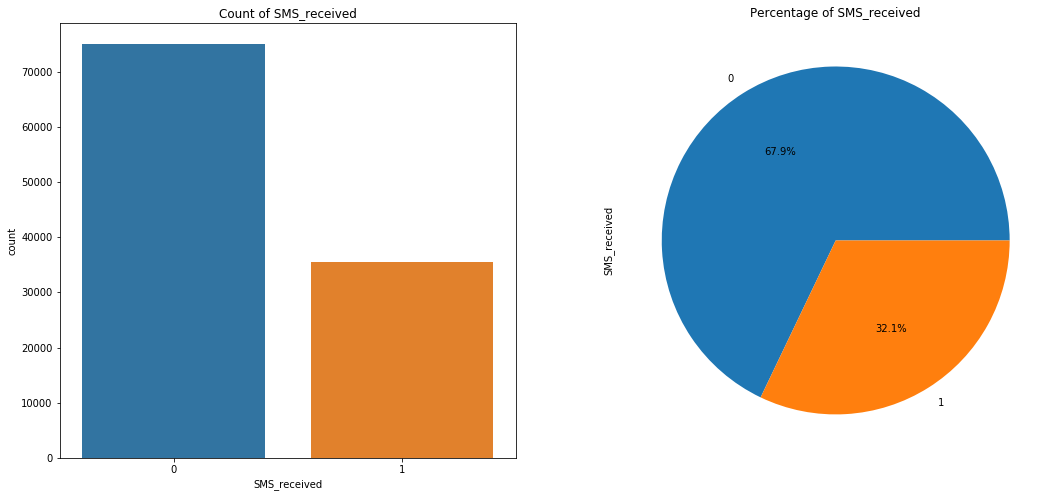

In [269]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(18,8))
sns.countplot('SMS_received', data=df, ax=ax1)
ax1.set_title('Count of SMS_received')

df['SMS_received'].value_counts().plot.pie(ax=ax2, autopct='%1.1f%%')
ax2.set_title('Percentage of SMS_received')
plt.show()

32.1% patients got the sms for the appointment.

### No_show

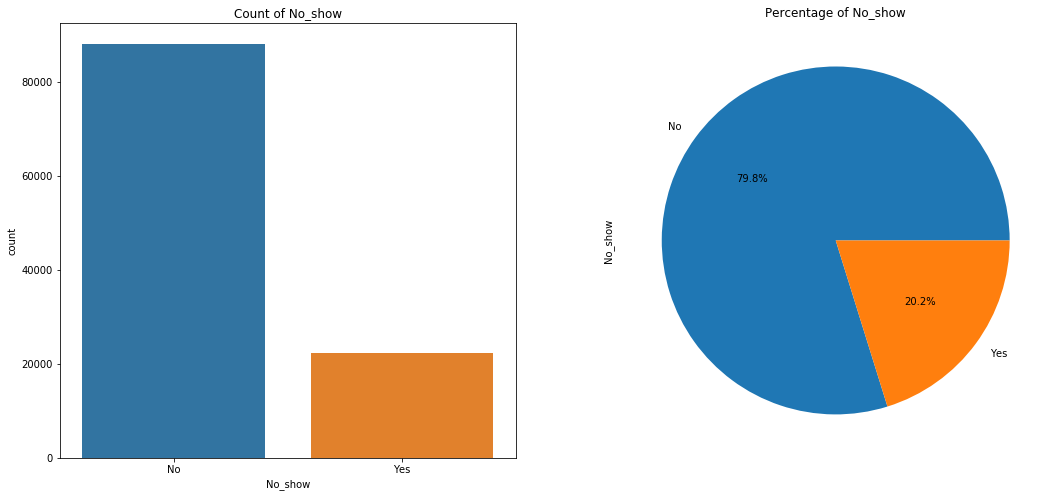

In [270]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(18,8))
sns.countplot('No_show', data=df, ax=ax1)
ax1.set_title('Count of No_show')

df['No_show'].value_counts().plot.pie(ax=ax2, autopct='%1.1f%%')
ax2.set_title('Percentage of No_show')
plt.show()

Only 20.2% patients missed their scheduled appointment.

## Awaiting Day

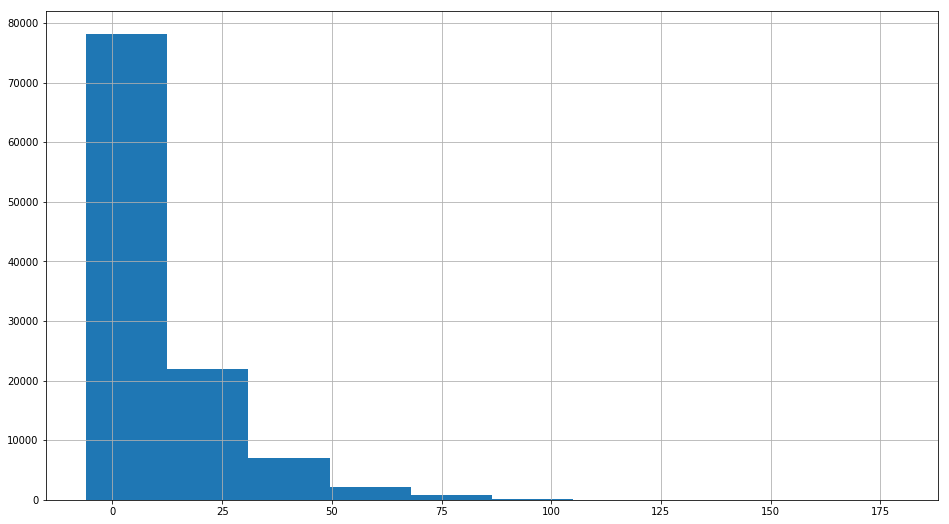

In [271]:
plt.figure(figsize=(16,9))
df['Awaiting_day'].hist()

Most of the people waited for 10 to 20 days. But here it is showing that some people appointed before the appointement date which is not possible. We have to drop those columns.

In [272]:
df=df[df.Awaiting_day >= 0]

So we have excluided all the records where awaiting day was in negative.

### Day of Appointment

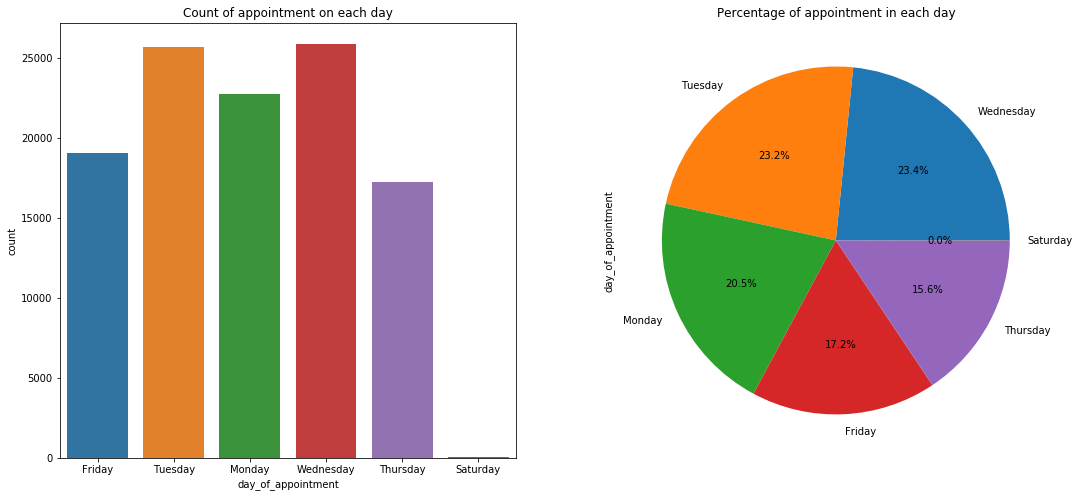

In [273]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(18,8))
sns.countplot('day_of_appointment', data=df, ax=ax1)
ax1.set_title('Count of appointment on each day')

df['day_of_appointment'].value_counts().plot.pie(ax=ax2, autopct='%1.1f%%')
ax2.set_title('Percentage of appointment in each day')
plt.savefig('output.png', dpi=300)
plt.show()

All the appointments were done on the weekdays. There are very few appointment in saturday.

## Bivariate 

### Gender vs Show/No_show

Text(0.5, 1.0, 'Show / No-Show for Females and Males')

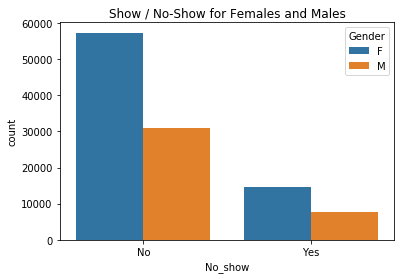

In [274]:
ax=sns.countplot(x="No_show",hue='Gender', data=df)
ax.set_title("Show / No-Show for Females and Males")

In [275]:
df[df['No_show']=='Yes']['Gender'].value_counts()

F    14588
M     7723
Name: Gender, dtype: int64

7725 male and 14591 female were missed from the appointments

### Age vs Show/No_show

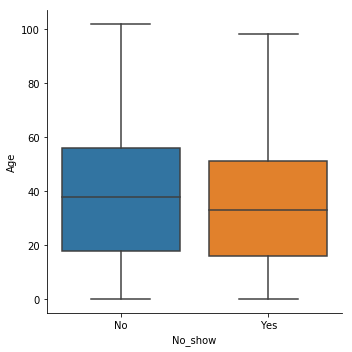

In [276]:
sns.catplot(x="No_show", y="Age",kind='box', data=df)

18-55 years old, the rate of no_shows seems to be high.

### Neighbourhood vs Show/No_show

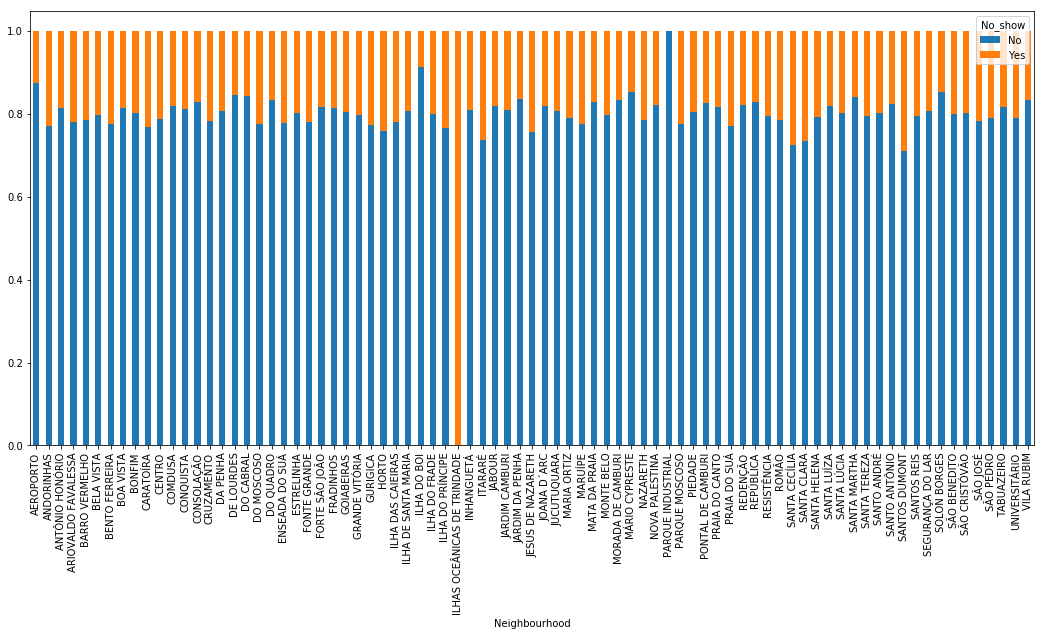

In [277]:
#plt.figure(figsize=(18,8))
props = df.groupby("Neighbourhood")['No_show'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked='True', figsize=(18,8))

In [303]:
df.Neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4430
JARDIM DA PENHA                3877
ITARARÉ                        3514
CENTRO                         3334
SANTA MARTHA                   3131
TABUAZEIRO                     3131
JESUS DE NAZARETH              2853
BONFIM                         2773
SANTO ANTÔNIO                  2744
SANTO ANDRÉ                    2571
CARATOÍRA                      2565
JABOUR                         2509
SÃO PEDRO                      2448
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2264
ANDORINHAS                     2258
DA PENHA                       2217
ROMÃO                          2214
GURIGICA                       2018
SÃO JOSÉ                       1976
BELA VISTA                     1907
MARUÍPE                        1902
FORTE SÃO JOÃO                 1889
ILHA DE SANTA MARIA            1885
SÃO CRISTÓVÃO                  1836
REDENÇÃO                    

So from the above figure we get an interesting data. That is No one from ILIHAS OCEANICAS DE TRINDADE neighbourhood had 
come for the appointment. And everone from PRAQUE INDUSTRIAL neighbourhood had come for the appointment.

### Scholarship vs Show/No_show

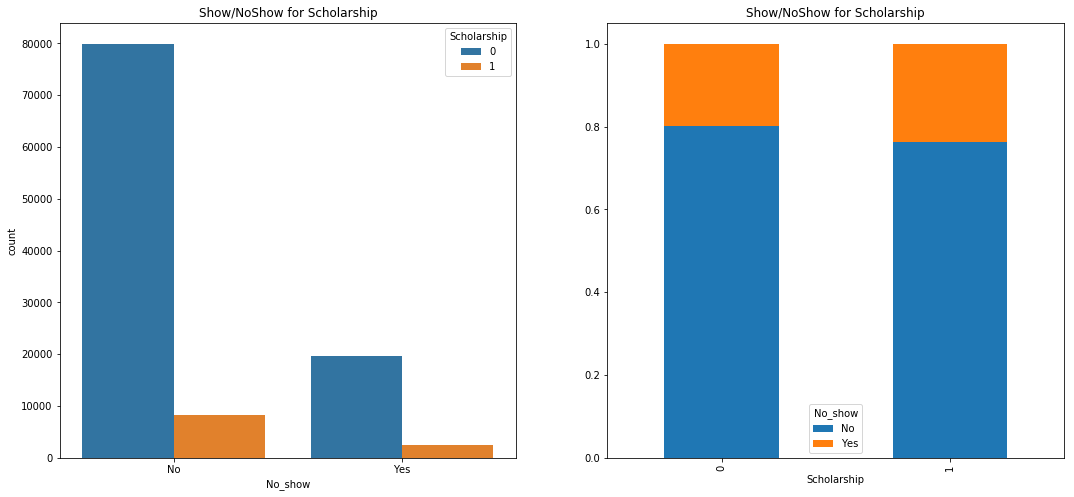

In [278]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(18,8))
sns.countplot(x="No_show",hue='Scholarship',ax=ax1, data=df)
ax1.set_title("Show/NoShow for Scholarship")
props = df.groupby("Scholarship")['No_show'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked='True', ax=ax2)
ax2.set_title("Show/NoShow for Scholarship")
plt.show()

From the above visualization, we can see that there are around 100,000 patients without Scholarship and out of them around 80% have come for the visit. And 75% of those people who are having scholarship have come to visit.
So, Scholarship feature could help us in determining if a patient will turn up for the visit after an appointment

### Hypertension vs Show/No_show

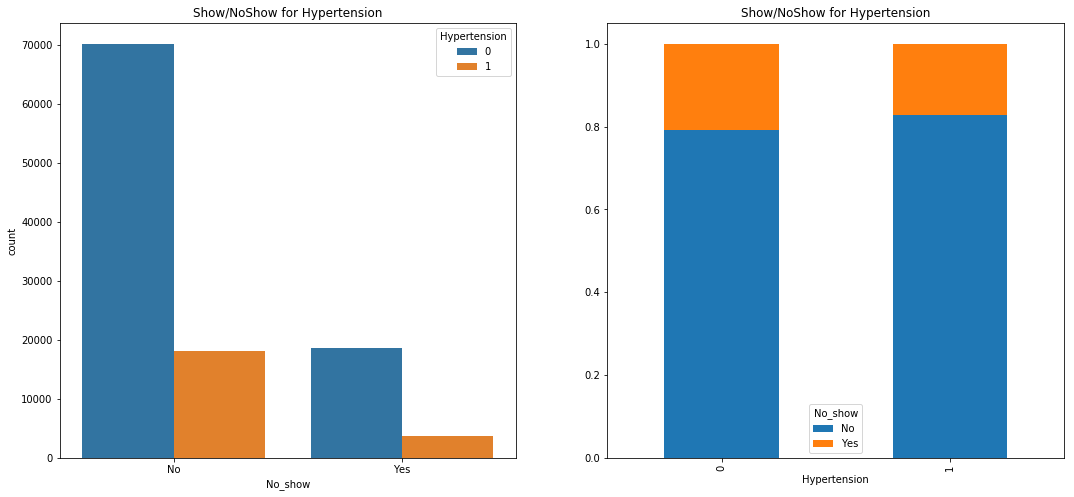

In [279]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(18,8))
sns.countplot(x="No_show",hue='Hypertension',ax=ax1, data=df)
ax1.set_title("Show/NoShow for Hypertension")
props = df.groupby("Hypertension")['No_show'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked='True', ax=ax2)
ax2.set_title("Show/NoShow for Hypertension")
plt.show()

From above visualisation, we got that, around 80% of those people who were not having hypertension came to visit and around 82%
of those people who are having hypertension came to visit. So, Hypertension feature could also help us in determining if a patient will turn up for the visit after an appointment or not.

### Diabetes vs Show/No_show

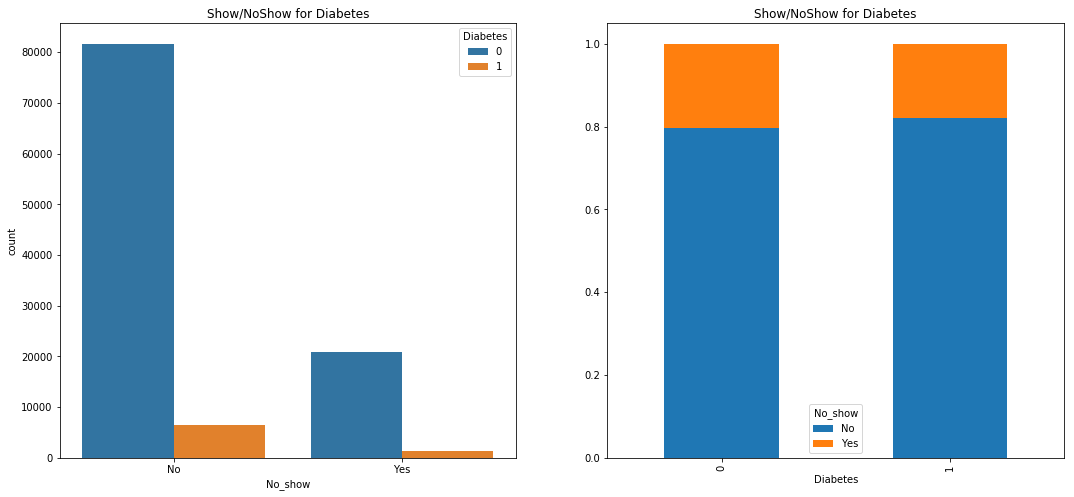

In [280]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(18,8))
sns.countplot(x="No_show",hue='Diabetes',ax=ax1, data=df)
ax1.set_title("Show/NoShow for Diabetes")
props = df.groupby("Diabetes")['No_show'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked='True', ax=ax2)
ax2.set_title("Show/NoShow for Diabetes")
plt.show()

Similarly Here also, around 80% of people who are having diabetes or not having diabetes had come for visit.

### Alcoholism vs Show/No_show

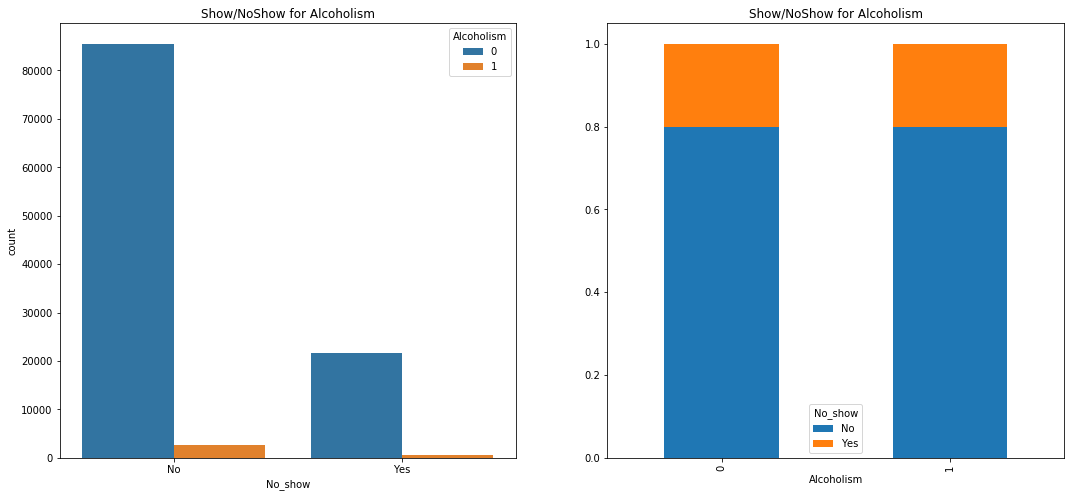

In [281]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(18,8))
sns.countplot(x="No_show",hue='Alcoholism',ax=ax1, data=df)
ax1.set_title("Show/NoShow for Alcoholism")
props = df.groupby("Alcoholism")['No_show'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked='True', ax=ax2)
ax2.set_title("Show/NoShow for Alcoholism")
plt.show()

From above visualisation, we got that, around 80% of those people who were not having Alcoholism came to visit and around 81%
of those people who are having Alcoholism came to visit. So, Alcoholism feature could also help us in determining if a 
patient will turn up for the visit after an appointment or not.

### Handicap vs Show/No_show

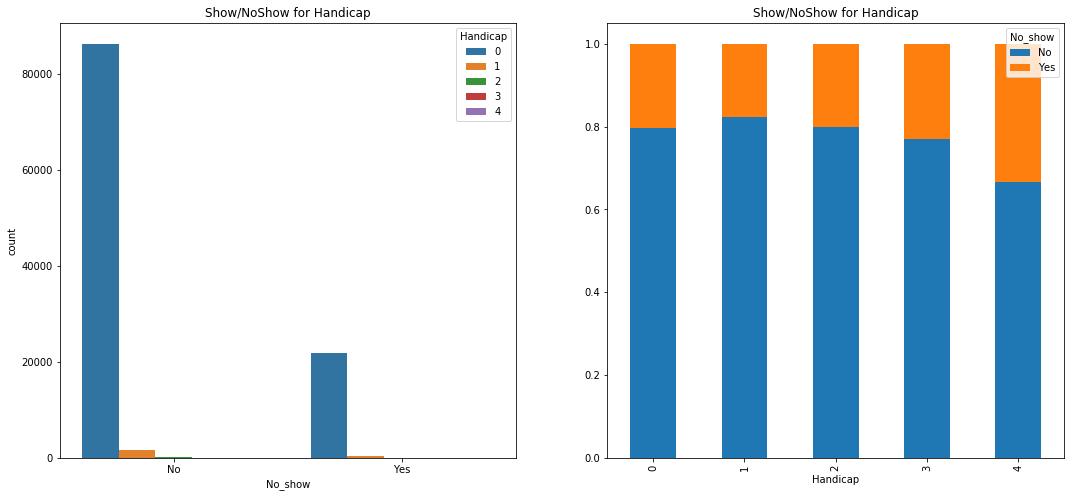

In [282]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(18,8))
sns.countplot(x="No_show",hue='Handicap',ax=ax1, data=df)
ax1.set_title("Show/NoShow for Handicap")
props = df.groupby("Handicap")['No_show'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked='True', ax=ax2)
ax2.set_title("Show/NoShow for Handicap")
plt.show()

From the above visualization we can see that there are around 110,000 patients without Handicap and out of them around 80% have 
come for the visit. As we can see a clear distinction between different Handicap levels this feature will help us in determining if a patient will turn up for the visit after taking an appointment.

### SMS_received VS Show/No_show

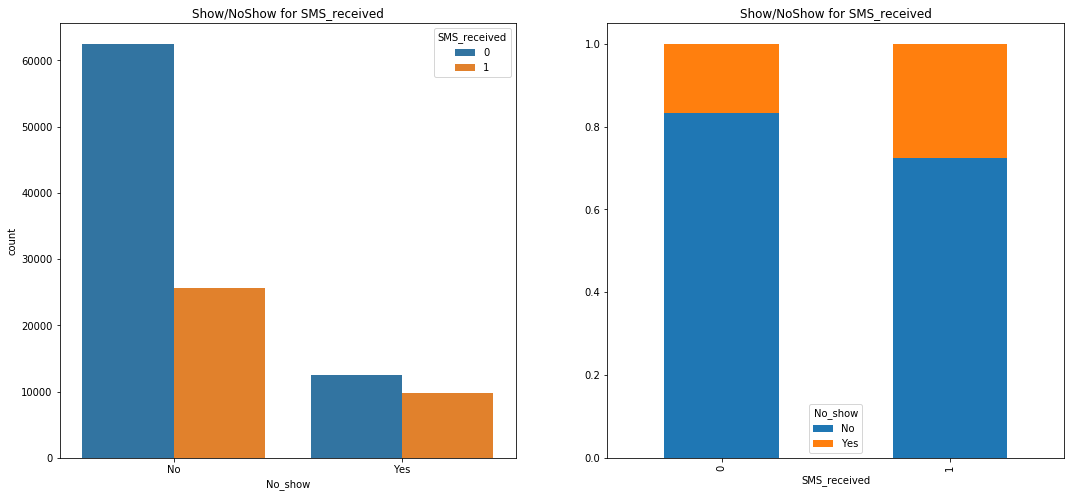

In [283]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(18,8))
sns.countplot(x="No_show",hue='SMS_received',ax=ax1, data=df)
ax1.set_title("Show/NoShow for SMS_received")
props = df.groupby("SMS_received")['No_show'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked='True', ax=ax2)
ax2.set_title("Show/NoShow for SMS_received")
plt.show()

* From the above visualization, we can see that there are around 95,000 patients who did not receive any SMS and interestingly out of them around 84% have come for the visit. Out of the 20,500 patients who have received SMS around 70% of them have come for the visit. 
* But generally, People who do receive a reminder SMS usually tend to visit the hospital more than those whohas not received any sms.So I think, this is not an remainder message.This may be some other message during the registration for the appointment. This could possibly have no correlation with the visit probability.
* As we can see a clear distinction between people reveiving SMS and not receiving SMS this feature will help us in determining if a patient will turn up for the visit after taking an appointment or not.

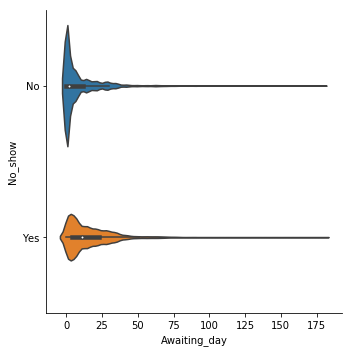

In [284]:
sns.catplot(x="Awaiting_day", y="No_show",
            kind="violin",data=df)
plt.show()

* From the above visualization, we can see that around 90% of the patients who booked their appointments on the same day 
had visited the hospital without fail. Also close to 80% of the patients are visiting the hospital if they had booked their 
appointments just before 4-10 days.
* As we have a clear distinction for the patients Show/NoShow with the Waiting_Time_days feature this indeed should help us with 
a better prediction.









### Day of appointment vs Show/No_show

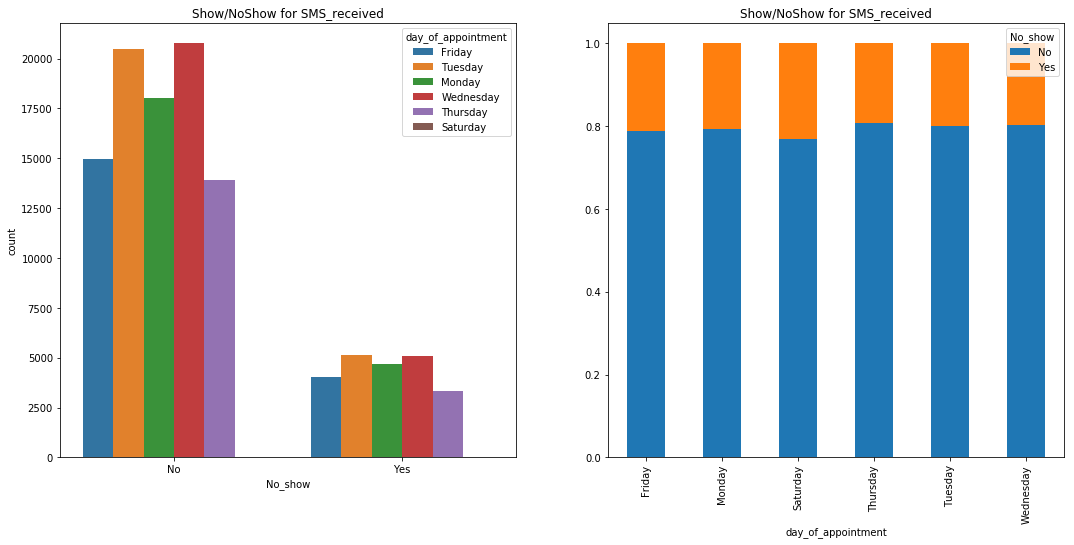

In [285]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(18,8))
sns.countplot(x="No_show",hue='day_of_appointment',ax=ax1, data=df)
ax1.set_title("Show/NoShow for SMS_received")
props = df.groupby("day_of_appointment")['No_show'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked='True', ax=ax2)
ax2.set_title("Show/NoShow for SMS_received")
plt.show()

From the above visualisation, we do not see a clear pattern in the patients visits based on the week day. Around 80% patient had visited on on weekday. But we can observe that on Saturday's the percentage of visits is less. So, AppointmentDay_DOW can help us in predicting the visits by a small number.

### Let's find out those patient who had more than One appointment.

In [286]:
df['Patient_id'].value_counts().head(10)

822145925426128    88
99637671331        84
26886125921145     70
33534783483176     65
258424392677       62
75797461494159     62
871374938638855    62
6264198675331      62
66844879846766     57
872278549442       55
Name: Patient_id, dtype: int64

These are the top 10 patient ID who had more than one appointment. The number of appointments of top 10 patients varies from 88 to 55.
Taking into consideration that time span for this medical appointment was around 1.5 months. In this short span of time, a patient
has visited 55 to 88 times. This is very strange. This could be one of the reason of no show. Because Patient might become tired 
by visiting several times. Or the working hour of hospital is not enough for all the appointment on a particular day.There could be
also other reasons. The high number of appointments over a short period of time should be considered as a factor of no show.

### Outliers treatment of each Numerical value

In [290]:
def num_plots(feature,xlable):
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.boxplot(feature)
    plt.xlabel(xlable)
    plt.subplot(122)
    sns.kdeplot(feature,shade=True)
    

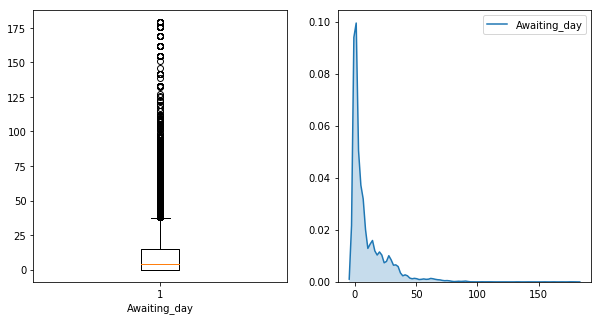

In [291]:
num_plots(df.Awaiting_day,'Awaiting_day')

In [292]:
# appling log transformation to reduce skewness and outliers in Awating_day column
df.Awaiting_day = np.log1p(df.Awaiting_day)

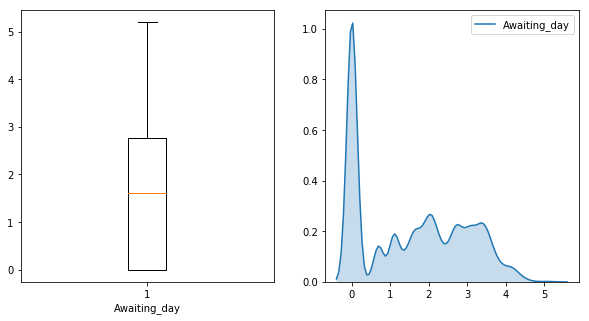

In [293]:
num_plots(df.Awaiting_day,'Awaiting_day')

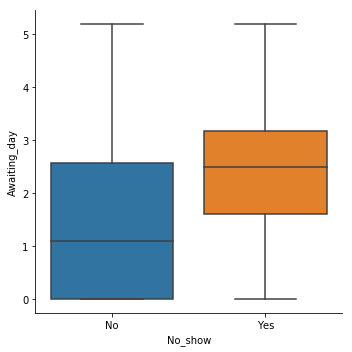

In [294]:
sns.catplot(x="No_show", y="Awaiting_day",kind='box', data=df)

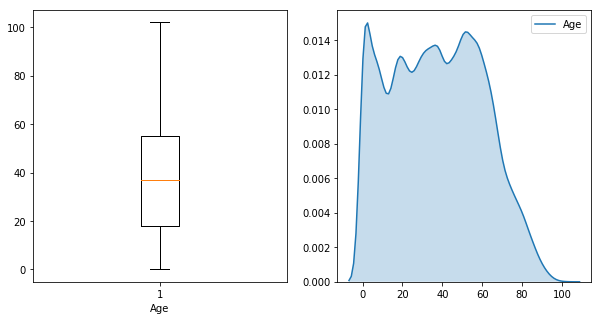

In [295]:
num_plots(df.Age,'Age')

No outliers in Age

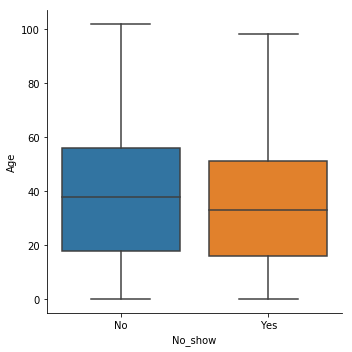

In [155]:
sns.catplot(x="No_show", y="Age",kind='box', data=df)

Looks like age doesn't have influence on show or no show.
So we are going for another approach.
Converting age into five different categories.

Age       category

0 -10 --> baby

11-20 --> teen

21- 40 --> young_adult

40-60 --> adult

61 > --> senior

In [297]:
def age_conv(x):
    if (x>=0) and (x<=10):
        return 'baby'
    elif  (x>=11) and (x<=20):
        return 'teen'
    elif  (x>=21) and (x<=40):
        return 'young_adult'
    elif  (x>=41) and (x<= 60):
        return 'adult'
    elif  (x>=61):
        return 'senior'


df.Age = df.Age.apply(age_conv)

In [298]:
df.Age.unique()

array(['senior', 'adult', 'baby', 'young_adult', 'teen'], dtype=object)

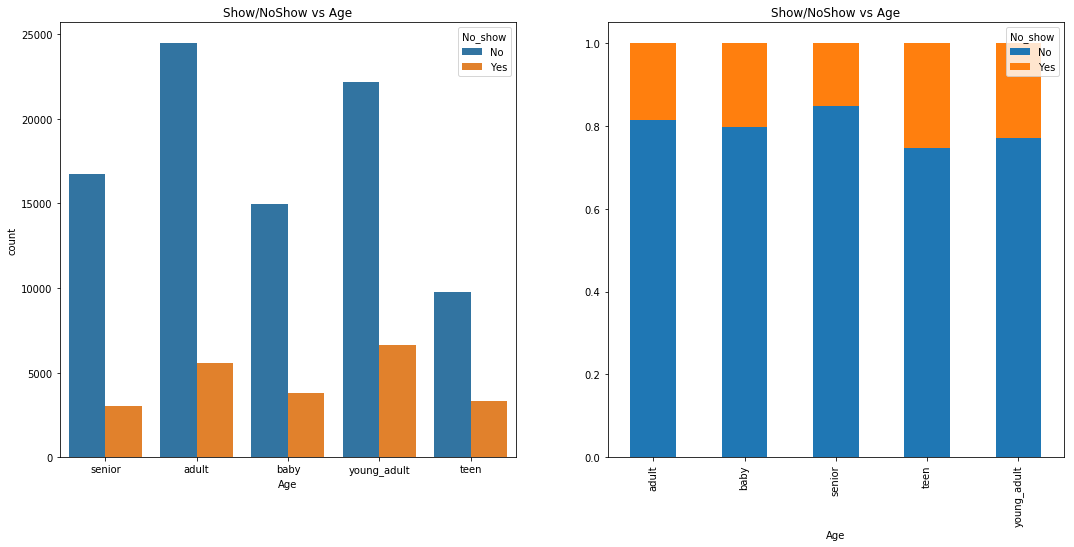

In [301]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(18,8))
sns.countplot(x="Age",hue='No_show',ax=ax1, data=df)
ax1.set_title("Show/NoShow vs Age")
props = df.groupby("Age")['No_show'].value_counts(normalize=True).unstack()
props.plot(kind='bar', stacked='True', ax=ax2)
ax2.set_title("Show/NoShow vs Age")
plt.show()

# <font color='blue'>Building Model</font>

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110516 entries, 0 to 110526
Data columns (total 16 columns):
Patient_id            110516 non-null int64
Appointment_id        110516 non-null int64
Gender                110516 non-null object
Scheduled_day         110516 non-null datetime64[ns]
Appointment_day       110516 non-null datetime64[ns]
Age                   110516 non-null int64
Neighbourhood         110516 non-null object
Scholarship           110516 non-null int64
Hypertension          110516 non-null int64
Diabetes              110516 non-null int64
Alcoholism            110516 non-null int64
Handicap              110516 non-null int64
SMS_received          110516 non-null int64
No_show               110516 non-null object
Awaiting_day          110516 non-null int64
day_of_appointment    110516 non-null object
dtypes: datetime64[ns](2), int64(10), object(4)
memory usage: 19.3+ MB


We have to drop patient_id, Appointment_id, Scheduled_day, Appointment_day and Neighbourhood columns. Because these columns have
so many attributes.So these column will not help wisely in building our model. 

In [304]:
df=df.drop(['Patient_id','Appointment_id','Scheduled_day','Appointment_day'],axis=1)
#df.sample(n=5)

In [305]:
df = pd.get_dummies(df,drop_first=True) # converting directly to dummy variables (dataframe)

In [306]:
df.head()

,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Awaiting_day,Gender_M,Age_baby,Age_senior,...,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM,No_show_Yes,day_of_appointment_Monday,day_of_appointment_Saturday,day_of_appointment_Thursday,day_of_appointment_Tuesday,day_of_appointment_Wednesday
0,0,1,0,0,0,0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Get the Dependent and Independent Features.

In [310]:
X = df.drop(['No_show_Yes'], axis=1)
y = df['No_show_Yes']

### Train_test_split

In [311]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [312]:
X_train.head()

,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Awaiting_day,Gender_M,Age_baby,Age_senior,...,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM,day_of_appointment_Monday,day_of_appointment_Saturday,day_of_appointment_Thursday,day_of_appointment_Tuesday,day_of_appointment_Wednesday
31207,0,0,0,0,0,0,1.386294,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10320,0,0,0,0,0,0,1.609438,1,0,0,...,0,0,0,0,0,0,0,0,1,0
68012,0,0,0,0,0,0,3.850148,0,0,0,...,0,0,0,0,0,0,0,0,0,0
87475,0,0,0,0,0,1,1.791759,1,1,0,...,0,0,0,0,0,1,0,0,0,0
6847,0,1,0,0,0,0,1.098612,0,0,0,...,0,0,0,0,0,0,0,0,0,1


<font color='red'> LOGISTIC REGRESSION MODEL </font>

In [313]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [314]:
print('Train size:{}'.format(X_train.shape))
print('Test size:{}'.format(X_test.shape))

Train size:(82887, 97)
Test size:(27629, 97)


In [315]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_preds = model.predict(X_test)


print('Accuracy: {:2.2f}%'.format(accuracy_score(y_test, y_preds) * 100))
print('Precision score: {:2.2f}%'.format(precision_score(y_test, y_preds)*100))
print('Recall score: {:2.2f}%'.format(recall_score(y_test, y_preds)*100))
print('F1-score: {:2.2f}%'.format(f1_score(y_test, y_preds) * 100),'\n')
 
print('confusion matrix','\n \n',confusion_matrix(y_test, y_preds))
fpr,tpr,threshold=roc_curve(y_test,y_preds)
roc_auc = auc(fpr,tpr)
print('\n AUC',roc_auc)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 79.77%
Precision score: 44.57%
Recall score: 3.48%
F1-score: 6.46% 

confusion matrix 
 
 [[21846   240]
 [ 5350   193]]


In [316]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred_prob = model.predict_proba(X_test)

print(y_pred_prob[:,1])
y_preds=[1 if i>0.35 else 0 for i in y_pred_prob[:,1]]
np.array(y_preds)

print('Accuracy: {:2.2f}%'.format(accuracy_score(y_test, y_preds) * 100))
print('Precision score: {:2.2f}%'.format(precision_score(y_test, y_preds)*100))
print('Recall score: {:2.2f}%'.format(recall_score(y_test, y_preds)*100))
print('F1-score: {:2.2f}%'.format(f1_score(y_test, y_preds) * 100),'\n')
 
print('confusion matrix','\n \n',confusion_matrix(y_test, y_preds))
fpr,tpr,threshold=roc_curve(y_test,y_preds)
roc_auc = auc(fpr,tpr)
print('\n AUC',roc_auc)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.2310286  0.3009122  0.11069515 ... 0.28029513 0.1196914  0.1353279 ]
Accuracy: 76.01%
Precision score: 37.40%
Recall score: 29.01%
F1-score: 32.67% 

confusion matrix 
 
 [[19394  2692]
 [ 3935  1608]]


In [368]:
model = RandomForestClassifier(n_estimators=500,random_state = 0)
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

print('RF - Accuracy: {:2.2f}%'.format(accuracy_score(y_test, y_preds) * 100))
print('RF - Precision score: {:2.2f}%'.format(precision_score(y_test, y_preds)*100))
print('RF - Recall score: {:2.2f}%'.format(recall_score(y_test, y_preds)*100))
print('RF - F1-score: {:2.2f}%'.format(f1_score(y_test, y_preds) * 100),'\n')
 
print('confusion matrix','\n \n',confusion_matrix(y_test, y_preds))
fpr,tpr,threshold=roc_curve(y_test,y_preds)
roc_auc = auc(fpr,tpr)
print('\n AUC',roc_auc)

RF - Accuracy: 77.15%
RF - Precision score: 38.48%
RF - Recall score: 23.20%
RF - F1-score: 28.95% 

confusion matrix 
 
 [[20030  2056]
 [ 4257  1286]]

 AUC 0.569456842063716


In [321]:
model = XGBClassifier(learning_rate =0.04,
n_estimators=1000,
max_depth=5,
min_child_weight=1,
gamma=0,
subsample=0.8,
colsample_bytree=0.8,
objective= 'binary:logistic',
nthread=4,
scale_pos_weight=1)
    
model.fit(X_train, y_train)
y_preds = model.predict(X_test)
print('Accuracy: {:2.2f}%'.format(accuracy_score(y_test, y_preds) * 100))
print('Precision score: {:2.2f}%'.format(precision_score(y_test, y_preds)*100))
print('Recall score: {:2.2f}%'.format(recall_score(y_test, y_preds)))
print('F1-score: {:2.2f}%'.format(f1_score(y_test, y_preds) * 100))

print('confusion matrix','\n \n',confusion_matrix(y_test, y_preds))
fpr,tpr,threshold=roc_curve(y_test,y_preds)
roc_auc = auc(fpr,tpr)
print('\n AUC',roc_auc)

Accuracy: 80.02%
Precision score: 52.22%
Recall score: 0.05%
F1-score: 8.58%
confusion matrix 
 
 [[21849   237]
 [ 5284   259]]


In [355]:
 model = GradientBoostingClassifier(random_state = 0)
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

print('GB - Accuracy: {:2.2f}%'.format(accuracy_score(y_test, y_preds) * 100))
print('GB - Precision score: {:2.2f}%'.format(precision_score(y_test, y_preds)*100))
print('GB - Recall score: {:2.2f}%'.format(recall_score(y_test, y_preds)))
print('GB - F1-score: {:2.2f}%'.format(f1_score(y_test, y_preds) * 100))

print('confusion matrix','\n \n',confusion_matrix(y_test, y_preds))
fpr,tpr,threshold=roc_curve(y_test,y_preds)
roc_auc = auc(fpr,tpr)
print('\n AUC',roc_auc)

GB - Accuracy: 79.92%
GB - Precision score: 46.43%
GB - Recall score: 0.01%
GB - F1-score: 1.39%
confusion matrix 
 
 [[22041    45]
 [ 5504    39]]

 AUC 0.5024992056620088


In [336]:
model = lgm.LGBMClassifier(max_depth=5,
                                   n_estimators=2000,
                                   learning_rate=0.4,
                                   num_leaves=15,
                                   colsample_bytree=0.7,
                                   objective='binary', 
                                   n_jobs=-1)

model.fit(X_train, y_train)
y_preds = model.predict(X_test)

print('GB - Accuracy: {:2.2f}%'.format(accuracy_score(y_test, y_preds) * 100))
print('GB - Precision score: {:2.2f}%'.format(precision_score(y_test, y_preds)*100))
print('GB - Recall score: {:2.2f}%'.format(recall_score(y_test, y_preds)))
print('GB - F1-score: {:2.2f}%'.format(f1_score(y_test, y_preds) * 100))

print('confusion matrix','\n \n',confusion_matrix(y_test, y_preds))
fpr,tpr,threshold=roc_curve(y_test,y_preds)
roc_auc = auc(fpr,tpr)
print('\n AUC',roc_auc)

GB - Accuracy: 79.07%
GB - Precision score: 44.00%
GB - Recall score: 0.16%
GB - F1-score: 23.41%
confusion matrix 
 
 [[20961  1125]
 [ 4659   884]]


### Feature selection using  RFE

In [372]:
logreg = LogisticRegression()
rfe= RFE(logreg,20) # taking top 10 featrues

In [373]:
names=X.columns

In [374]:
names

Index(['Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap',
       'SMS_received', 'Awaiting_day', 'Gender_M', 'Age_baby', 'Age_senior',
       'Age_teen', 'Age_young_adult', 'Neighbourhood_ANDORINHAS',
       'Neighbourhood_ANTÔNIO HONÓRIO', 'Neighbourhood_ARIOVALDO FAVALESSA',
       'Neighbourhood_BARRO VERMELHO', 'Neighbourhood_BELA VISTA',
       'Neighbourhood_BENTO FERREIRA', 'Neighbourhood_BOA VISTA',
       'Neighbourhood_BONFIM', 'Neighbourhood_CARATOÍRA',
       'Neighbourhood_CENTRO', 'Neighbourhood_COMDUSA',
       'Neighbourhood_CONQUISTA', 'Neighbourhood_CONSOLAÇÃO',
       'Neighbourhood_CRUZAMENTO', 'Neighbourhood_DA PENHA',
       'Neighbourhood_DE LOURDES', 'Neighbourhood_DO CABRAL',
       'Neighbourhood_DO MOSCOSO', 'Neighbourhood_DO QUADRO',
       'Neighbourhood_ENSEADA DO SUÁ', 'Neighbourhood_ESTRELINHA',
       'Neighbourhood_FONTE GRANDE', 'Neighbourhood_FORTE SÃO JOÃO',
       'Neighbourhood_FRADINHOS', 'Neighbourhood_GOIABEIRAS',
       'Neig

In [375]:
fit = rfe.fit(X,y)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

In [376]:
print('Number of features:%d'%fit.n_features_)
print('selected features:%s'%fit.support_)

print('Feature Ranking: ',rfe.ranking_)
# feature sorted by their rank
sort =sorted( zip(map(lambda x : round(x,4),rfe.ranking_),names) )

Number of features:20
selected features:[False False False False False False  True False False  True  True False
 False  True False False False False False False False False False False
 False False False  True  True False  True False False False False False
 False False  True  True False False  True False  True  True False  True
  True False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False  True
  True False False False False False False  True False  True False False
 False]
Feature Ranking:  [17 65 33 10 57 13  1 69 32  1  1 12 25  1 20 18 26 31 78 73 19 77 52 70
 44 53 60  1  1 27  1 16 22 42 67 36 71 23  1  1  2  8  1 59  1  1 68  1
  1  5  1 21  7  6 47 54 38  4 39 40 37 29 49 24 45 11 72 28 55 51 46 30
 58 15 75 41 76  9 50 66 56  1 34  1  1 74 48 14  3 43 35  1 62  1 61 64
 63]


In [380]:
print(sort) # feature sorted by their rank

[(1, 'Age_senior'), (1, 'Age_teen'), (1, 'Awaiting_day'), (1, 'Neighbourhood_ANTÔNIO HONÓRIO'), (1, 'Neighbourhood_DE LOURDES'), (1, 'Neighbourhood_DO CABRAL'), (1, 'Neighbourhood_DO QUADRO'), (1, 'Neighbourhood_GURIGICA'), (1, 'Neighbourhood_HORTO'), (1, 'Neighbourhood_ILHA DO BOI'), (1, 'Neighbourhood_ILHA DO PRÍNCIPE'), (1, 'Neighbourhood_ILHAS OCEÂNICAS DE TRINDADE'), (1, 'Neighbourhood_ITARARÉ'), (1, 'Neighbourhood_JABOUR'), (1, 'Neighbourhood_JARDIM DA PENHA'), (1, 'Neighbourhood_SANTOS DUMONT'), (1, 'Neighbourhood_SEGURANÇA DO LAR'), (1, 'Neighbourhood_SOLON BORGES'), (1, 'Neighbourhood_VILA RUBIM'), (1, 'day_of_appointment_Saturday'), (2, 'Neighbourhood_ILHA DAS CAIEIRAS'), (3, 'Neighbourhood_SÃO PEDRO'), (4, 'Neighbourhood_MONTE BELO'), (5, 'Neighbourhood_JARDIM CAMBURI'), (6, 'Neighbourhood_JUCUTUQUARA'), (7, 'Neighbourhood_JOANA D´ARC'), (8, 'Neighbourhood_ILHA DE SANTA MARIA'), (9, 'Neighbourhood_SANTA MARTHA'), (10, 'Alcoholism'), (11, 'Neighbourhood_PONTAL DE CAMBURI'), (

In [381]:
X_train_transformed = fit.transform(X_train)
X_test_transformed = fit.transform(X_test)

In [382]:
X_test_transformed

array([[ 0.47769501, -0.47315533,  2.72272209, ..., -0.06549193,
        -0.0893856 , -0.01591921],
       [ 0.47769501, -0.47315533, -0.3672795 , ..., -0.06549193,
        -0.0893856 , -0.01591921],
       [-1.11888785, -0.47315533, -0.3672795 , ..., -0.06549193,
        -0.0893856 , -0.01591921],
       ...,
       [-0.32059642, -0.47315533, -0.3672795 , ..., -0.06549193,
        -0.0893856 , -0.01591921],
       [ 0.05058796,  2.11347084, -0.3672795 , ..., -0.06549193,
        -0.0893856 , -0.01591921],
       [-1.11888785, -0.47315533, -0.3672795 , ..., -0.06549193,
        -0.0893856 , -0.01591921]])

In [383]:
model = LogisticRegression()
model.fit(X_train_transformed,y_train)
y_preds = model.predict(X_test_transformed)


print('Accuracy: {:2.2f}%'.format(accuracy_score(y_test, y_preds) * 100))
print('Precision score: {:2.2f}%'.format(precision_score(y_test, y_preds)*100))
print('Recall score: {:2.2f}%'.format(recall_score(y_test, y_preds)*100))
print('F1-score: {:2.2f}%'.format(f1_score(y_test, y_preds) * 100),'\n')
 
print('confusion matrix','\n \n',confusion_matrix(y_test, y_preds))
fpr,tpr,threshold=roc_curve(y_test,y_preds)
roc_auc = auc(fpr,tpr)
print('\n AUC',roc_auc)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 79.73%
Precision score: 37.10%
Recall score: 1.48%
F1-score: 2.85% 

confusion matrix 
 
 [[21947   139]
 [ 5461    82]]

 AUC 0.5042499267578632


In [384]:
model = LogisticRegression()
model.fit(X_train_transformed,y_train)
y_pred_prob = model.predict_proba(X_test_transformed)

print(y_pred_prob[:,1])
y_preds=[1 if i>0.3 else 0 for i in y_pred_prob[:,1]]
y_preds=np.array(y_preds)

print('Accuracy: {:2.2f}%'.format(accuracy_score(y_test, y_preds) * 100))
print('Precision score: {:2.2f}%'.format(precision_score(y_test, y_preds)*100))
print('Recall score: {:2.2f}%'.format(recall_score(y_test, y_preds)*100))
print('F1-score: {:2.2f}%'.format(f1_score(y_test, y_preds) * 100),'\n')
 
print('confusion matrix','\n \n',confusion_matrix(y_test, y_preds))
fpr,tpr,threshold=roc_curve(y_test,y_preds)
roc_auc = auc(fpr,tpr)
print('\n AUC',roc_auc)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.30342262 0.30215307 0.11873348 ... 0.15007665 0.13391612 0.12730617]
Accuracy: 72.91%
Precision score: 34.80%
Recall score: 40.14%
F1-score: 37.28% 

confusion matrix 
 
 [[17918  4168]
 [ 3318  2225]]

 AUC 0.6063451730168535


In [363]:
model = RandomForestClassifier(n_estimators=500,random_state = 0)
model.fit(X_train_transformed, y_train)
y_preds = model.predict(X_test_transformed)

print('RF - Accuracy: {:2.2f}%'.format(accuracy_score(y_test, y_preds) * 100))
print('RF - Precision score: {:2.2f}%'.format(precision_score(y_test, y_preds)*100))
print('RF - Recall score: {:2.2f}%'.format(recall_score(y_test, y_preds)*100))
print('RF - F1-score: {:2.2f}%'.format(f1_score(y_test, y_preds) * 100),'\n')
 
print('confusion matrix','\n \n',confusion_matrix(y_test, y_preds))
fpr,tpr,threshold=roc_curve(y_test,y_preds)
roc_auc = auc(fpr,tpr)
print('\n AUC',roc_auc)

RF - Accuracy: 79.79%
RF - Precision score: 41.35%
RF - Recall score: 1.77%
RF - F1-score: 3.39% 

confusion matrix 
 
 [[21947   139]
 [ 5445    98]]

 AUC 0.505693188529467


In [369]:
model = lgm.LGBMClassifier(max_depth=5,
                                   n_estimators=500,
                                   learning_rate=0.1,
                                   num_leaves=15,
                                   colsample_bytree=0.7,
                                   objective='binary', 
                                   n_jobs=-1)

model.fit(X_train_transformed, y_train)
y_preds = model.predict(X_test_transformed)

print('GB - Accuracy: {:2.2f}%'.format(accuracy_score(y_test, y_preds) * 100))
print('GB - Precision score: {:2.2f}%'.format(precision_score(y_test, y_preds)*100))
print('GB - Recall score: {:2.2f}%'.format(recall_score(y_test, y_preds)))
print('GB - F1-score: {:2.2f}%'.format(f1_score(y_test, y_preds) * 100))

print('confusion matrix','\n \n',confusion_matrix(y_test, y_preds))
fpr,tpr,threshold=roc_curve(y_test,y_preds)
roc_auc = auc(fpr,tpr)
print('\n AUC',roc_auc)

GB - Accuracy: 79.89%
GB - Precision score: 40.91%
GB - Recall score: 0.00%
GB - F1-score: 0.96%
confusion matrix 
 
 [[22047    39]
 [ 5516    27]]

 AUC 0.501552591987476


# Best Model from above observations

In [385]:
model = LogisticRegression()
model.fit(X_train_transformed,y_train)
y_pred_prob = model.predict_proba(X_test_transformed)

print(y_pred_prob[:,1])
y_preds=[1 if i>0.3 else 0 for i in y_pred_prob[:,1]]
y_preds=np.array(y_preds)

print('Accuracy: {:2.2f}%'.format(accuracy_score(y_test, y_preds) * 100))
print('Precision score: {:2.2f}%'.format(precision_score(y_test, y_preds)*100))
print('Recall score: {:2.2f}%'.format(recall_score(y_test, y_preds)*100))
print('F1-score: {:2.2f}%'.format(f1_score(y_test, y_preds) * 100),'\n')
 
print('confusion matrix','\n \n',confusion_matrix(y_test, y_preds))
fpr,tpr,threshold=roc_curve(y_test,y_preds)
roc_auc = auc(fpr,tpr)
print('\n AUC',roc_auc)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.30342262 0.30215307 0.11873348 ... 0.15007665 0.13391612 0.12730617]
Accuracy: 72.91%
Precision score: 34.80%
Recall score: 40.14%
F1-score: 37.28% 

confusion matrix 
 
 [[17918  4168]
 [ 3318  2225]]

 AUC 0.6063451730168535


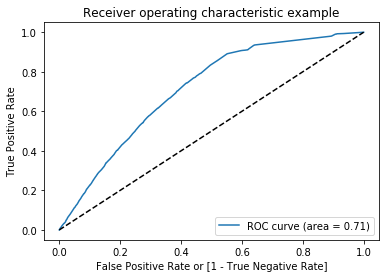

In [386]:
### roc plot for class '1'
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob[:,1])
roc_auc = auc(fpr,tpr)

plt.figure(figsize=(6, 4))
plt.plot( fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc )
plt.plot([0, 1], [0, 1], 'k--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


# Conclusion :

Some Important Analysis are :

1.	Average awaiting days of the patients are 10 days. 75% patients waited upto 15days and 50% patients waited upto 4 days. Only 25%patients got the appointment on the same date. There is one case where the patients got the appointment before the scheduled date which is not possible.
2.	Average age of the patient is 37. And 25% patients are below 18. But most of the patients are below 55. As per our dataset, min and max age of the patient is -1 and 115 which is not possible.
3.	there are more female patients compare to male patient. 71840 female patients are there and 38687 male patients are there
4.	We can see from the above details that the ScheduledDay for appointments are ranging from 2015-11-10 to 2016-06-08 and that's around 7 months of data.
5.	Most of the schedules were made between April and June of 2016.
6.	From the above detail we can see that Appointment Day ranges from 2016-04-29 to 2016-06-08.
7.	90.2% of patient don't have any scholarship.
8.	All the appointments were done on the weekdays. There are very few appointment in saturday.

Results of Model:

1. In preparing the model I used Logistic regression, RandomForestClassifier, XGBClassifier, GradientBoostingClassifier,
LGBMClassifier. But Every time, My accuracy was around 80%. But the Precision, Recall and F1 score was very low. So I had to tune in the model. And Then Again I used all the same algorithm to build the model. Lastly I found that Logistic Regression is the best fit model with Accuracy 72.91%, Precision Score 34.80%, Recall score 40.14% and F1 score 37.28%. 
2. In future, the models can be upgraded with some better techniques in terms of getting higher and better accuracy, 
f1-score, precision, recall etc.